In [1]:
import torch

In [3]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)
print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[[-0.4418, -1.8217,  0.1915,  0.7931],
         [ 1.6653,  0.8416, -0.9112, -0.8525],
         [-0.0078,  1.6519, -1.2868, -1.2237]],

        [[ 2.3034, -0.7036,  0.5686, -0.0368],
         [ 0.3417,  0.2754,  0.4732,  0.9154],
         [-1.5877, -0.7069,  0.7879,  1.9167]]])


In [ ]:
tensor

tensor([[[ 0.4980, -0.2235,  0.5677,  1.5343],
         [-0.9509, -0.7612, -0.5748, -1.4758],
         [-0.7141, -0.2993,  1.8596,  0.2059]],

        [[ 1.1437, -0.1948,  2.0503,  0.4324],
         [ 0.5184, -1.1625, -1.5825,  2.3911],
         [-1.0133,  0.8197,  0.5835,  0.6850]]])

In [4]:
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


In [5]:
print(scalar.size(), scalar.shape)

torch.Size([]) torch.Size([])


In [6]:
vector.shape

torch.Size([3])

In [8]:

a = torch.tensor([1,2,3])
b = torch.tensor([100,200,300])
a*b
a+b


tensor([101, 202, 303])

In [9]:
import torch

# Manually define the RGB values for a 2x4 image
# Shape: (Channels=3, Height=2, Width=4)

# Red channel
red = [
    [255, 0, 0, 255],   # Row 1
    [255, 0, 0, 255]    # Row 2
]

# Green channel
green = [
    [0, 255, 0, 255],
    [0, 255, 0, 255]
]

# Blue channel
blue = [
    [0, 0, 255, 255],
    [0, 0, 255, 255]
]

# Stack channels into a single tensor
rgb_tensor = torch.tensor([red, green, blue], dtype=torch.uint8)

print("Manual RGB Tensor:")
print(rgb_tensor)


Manual RGB Tensor:
tensor([[[255,   0,   0, 255],
         [255,   0,   0, 255]],

        [[  0, 255,   0, 255],
         [  0, 255,   0, 255]],

        [[  0,   0, 255, 255],
         [  0,   0, 255, 255]]], dtype=torch.uint8)


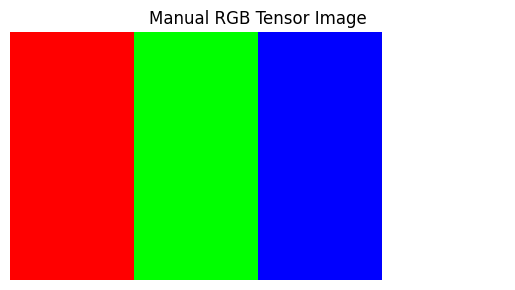

In [11]:
import matplotlib.pyplot as plt

image_tensor = rgb_tensor.permute(1, 2, 0)

# Plot the image
plt.imshow(image_tensor)
plt.title("Manual RGB Tensor Image")
plt.axis('off')  # Hide axes
plt.show()

Vamos que los tensores no se copian

Vamos a camiar la dimensión de la matriz:

In [12]:
matrix

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [13]:
same_matrix = matrix.view(1, 6)
print(same_matrix)

tensor([[0., 0., 0., 0., 0., 0.]])


In [14]:
#We get a tensor with a different shape but it still is
# the SAME tensor
same_matrix = matrix.view(1, 6)
# If we change one of its elements...
same_matrix[0, 1] = 2.
same_matrix

tensor([[0., 2., 0., 0., 0., 0.]])

In [15]:
# It changes both variables: matrix and same_matrix
print(matrix)
print(same_matrix)

tensor([[0., 2., 0.],
        [0., 0., 0.]])
tensor([[0., 2., 0., 0., 0., 0.]])


In [16]:
# We can use "new_tensor" method to REALLY copy it into a new one
different_matrix = matrix.new_tensor(matrix.view(1, 6))
# Now, if we change one of its elements...
different_matrix[0, 1] = 3.
# The original tensor (matrix) is left untouched!
# But we get a "warning" from PyTorch telling us
# to use "clone()" instead!
print(matrix)
print(different_matrix)

tensor([[0., 2., 0.],
        [0., 0., 0.]])
tensor([[0., 3., 0., 0., 0., 0.]])


<ipython-input-16-bac3a3914f46>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  different_matrix = matrix.new_tensor(matrix.view(1, 6))


In [17]:
# Let's follow PyTorch's suggestion and use "clone" method
another_matrix = matrix.view(1, 6).clone().detach()
# Again, if we change one of its elements...
another_matrix[0, 1] = 4.
# The original tensor (matrix) is left untouched!
print(matrix)
print(another_matrix)

tensor([[0., 2., 0.],
        [0., 0., 0.]])
tensor([[0., 4., 0., 0., 0., 0.]])


# Gradientes

In [18]:

x = torch.tensor([3.0,5.0,7.0])
print(x)

tensor([3., 5., 7.])


In [19]:
2 * x

tensor([ 6., 10., 14.])

In [20]:
x = torch.tensor([3.0,5.0,7.0],  requires_grad = True)
print(x)

tensor([3., 5., 7.], requires_grad=True)


In [21]:

y = x + 2
print(y)


tensor([5., 7., 9.], grad_fn=<AddBackward0>)


In [22]:
y.mean()

tensor(7., grad_fn=<MeanBackward0>)

In [23]:
z = x - 1
w = z * y
print(z)

tensor([2., 4., 6.], grad_fn=<SubBackward0>)


In [24]:
x = torch.tensor([3.0,5.0,7.0],  requires_grad = True)
y = x + 2
z = x - 1
w = z * y
w.mean()


tensor(30.6667, grad_fn=<MeanBackward0>)

In [27]:
#!pip install torchviz



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 872.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [28]:
import torch
from torchviz import make_dot

# Define tensors
x = torch.tensor([3.0, 5.0, 7.0], requires_grad=True)
y = x + 2
z = x - 1
w = z * y
out = w.mean()

# Create and display the computational graph
dot = make_dot(out, params={'x': x})
dot.render("graph", format="png", cleanup=False)  # Saves as graph.png
dot.view()  # Opens the image
make_dot(out, params={'x': x})

'graph.pdf'

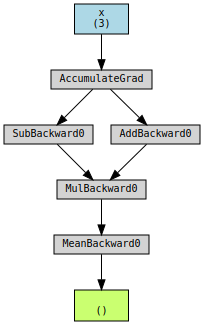

$$f(x) = x^2 + 3x + 2
$$ and his derivate $$f'(x) = 2x + 3
$$ evaluemos en dos:f(x) ) 12, y f'(x) = 7

In [34]:
import torch

# Define a tensor with requires_grad=True so PyTorch tracks it for differentiation
x = torch.tensor(2.0, requires_grad=True)
#2.0 creates a floating-point tensor (torch.float32 by default).
#2 (an integer) creates an integer tensor (torch.int64 by default), which does not support gradients in PyTorch.

# Define the function f(x) = x^2 + 3x + 2
f_x = x**2 + 3*x + 2

# Compute the gradient (derivative)
f_x.backward()

# Print the derivative at x = 2
print(f_x)            # Output: function value at x = 2
print(x.grad)         # Output: derivative at x = 2 (f'(2) = 7)

tensor(12., grad_fn=<AddBackward0>)
tensor(7.)


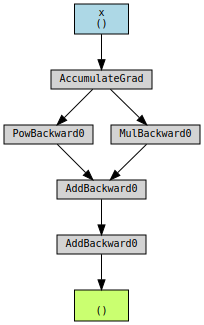

In [33]:
make_dot(f_x, params={'x': x})

In [35]:
# Otro ejemplo
import torch

# Define a tensor with requires_grad=True to track gradients
x = torch.tensor(2.0, requires_grad=True)

# Define the function f(x) = x^3 + 2x + 5
f_x = x**3 + 2*x + 5

# Compute the gradient (derivative)
f_x.backward()
# Print results
print(f"Function value at x=2: {f_x.item()}")  # f(2)
print(f"Derivative at x=2: {x.grad.item()}")   # f'(2)
# .item() converts a one-element tensor into a regular Python number (e.g., float or int)

Function value at x=2: 17.0
Derivative at x=2: 14.0


# Regla de la cadena
# Ejemplo 1
# Chain Rule Example with PyTorch

## **Chain Rule in Leibniz Notation**
If we have a composite function:
$$ y = f(g(x)) $$
Then, by the chain rule:
$$ \frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx} $$
where:
- \( g(x) \) is the **inner function**.
- \( f(g) \) is the **outer function**.

## **Example: \( z(x) = (x^2 + 1)^3 \)**

### **Step 1: Define the inner function**
$$ y = f(x) = x^2 + 1 $$
Derivative:
$$ \frac{dy}{dx} = 2x $$

### **Step 2: Define the outer function**
$$ g(y) = y^3 $$
Derivative:
$$ \frac{dg}{dy} = 3y^2 $$

### **Step 3: Apply the Chain Rule**
$$ \frac{dg}{dx} = \frac{dg}{dy} \cdot \frac{dy}{dx} $$
Substituting:
$$ \frac{dg}{dy} = 3y^2 = 3(x^2+1)^2$$
$$ \frac{dy}{dx} = 2x $$
$$ \frac{dg}{dx} = 6x(x^2+1)^2$$

In [37]:
import torch

# Define x as a tensor that requires gradients
x = torch.tensor(2.0, requires_grad=True)

# Step 1: Define the inner function y = f(x) = x^2 + 1
y = x**2 + 1

# Step 2: Define the outer function g(y) = y^3
g = y**3

# Compute the derivative using autograd #dg/dx
g.backward()

# Print results
print(f"Function value g(x) at x=2: {g.item()}")  # g(2)
print(f"Derivative dg/dx at x=2: {x.grad.item()}")   # dg/dx (2)

Function value g(x) at x=2: 125.0
Derivative dg/dx at x=2: 300.0


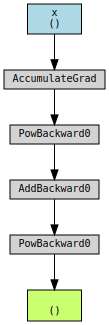

In [38]:
make_dot(g, params={'x': x})

# Ejemplo 2

In [42]:
x = torch.tensor([3.0,5.0,7.0], requires_grad = True)
print(x)

tensor([3., 5., 7.], requires_grad=True)


In [43]:
y = x + 2
print(y)

tensor([5., 7., 9.], grad_fn=<AddBackward0>)


In [44]:
y=2*y*y
print(y)

tensor([ 50.,  98., 162.], grad_fn=<MulBackward0>)


In [45]:
z = y.mean()
print(z)

tensor(103.3333, grad_fn=<MeanBackward0>)


Matematicamente

El valor de $$Y =
\begin{bmatrix}
2(X_1 + 2)^2 \\
2(X_2 + 2)^2 \\
2(X_3 + 2)^2
\end{bmatrix}
$$, note que esto es una función que va de $R^3$ a $R^3$

$$z = \frac{1}{3} \sum_{i=1}^{3} y_i$$

# Solución matemática:
El valor de $$Y =
\begin{bmatrix}
2(X_1 + 2)^2 \\
2(X_2 + 2)^2 \\
2(X_3 + 2)^2
\end{bmatrix}
$$, note que esto es una función que va de $R^3$ a $R^3$

$$
\frac{dz}{dX} = \frac{dz}{dY}^T \cdot \frac{dY}{dX}
$$

Queremos sacar la derivcada de z con respecto a X, $\frac{dz}{dX}$

> Añadir blockquote


Queremos sacar la derivcada de z con respecto a X, $\frac{dz}{dX}$



$$
\frac{dz}{dX} = \frac{dz}{dY}^t\frac{dY}{dX} =
\begin{bmatrix}
\frac{dz}{dy_1} & \frac{dz}{dy_2} & \frac{dz}{dy_3}
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac{dY_1}{dX_1} & \frac{dY_1}{dX_2} & \frac{dY_1}{dX_3} \\
\frac{dY_2}{dX_1} & \frac{dY_2}{dX_2} & \frac{dY_2}{dX_3} \\
\frac{dY_3}{dX_1} & \frac{dY_3}{dX_2} & \frac{dY_3}{dX_3}
\end{bmatrix}
$$


Resolviendo $\frac{dz}{dY}'= [1/3y_1, 1/3y_2, 1/3y_3]$

Por otro lado,

$$
\frac{dY}{dX} =
\begin{bmatrix}
\frac{dY_1}{dX_1} & \frac{dY_1}{dX_2} & \frac{dY_1}{dX_3} \\
\frac{dY_2}{dX_1} & \frac{dY_2}{dX_2} & \frac{dY_2}{dX_3} \\
\frac{dY_3}{dX_1} & \frac{dY_3}{dX_2} & \frac{dY_3}{dX_3}
\end{bmatrix}
=
\begin{bmatrix}
4(X_1 + 2) & 0 & 0 \\
0 & 4(X_2 + 2) & 0 \\
0 & 0 & 4(X_3 + 2)
\end{bmatrix}
$$

Sustituyendo numericamente: (4(3+2) / 3,  4(5+2) / 3,  4(7+2)/3 = (20/3,28/3,36/3) = (6.6, 9.9.33, 12 )

En torch:

In [46]:
x = torch.tensor([3.0,5.0,7.0], requires_grad = True)
y = x + 2
y=2*y*y
z = y.mean()


In [47]:
z.backward()
print(x.grad)

tensor([ 6.6667,  9.3333, 12.0000])


# Acumular el gradiente

In [49]:
import torch

# Creamos un tensor con gradientes
x = torch.tensor([2.0], requires_grad=True)

# Paso 1 - Calculamos la pérdida y el gradiente
loss1 = x ** 2  # f(x) = x^2
loss1.backward()  # Calculamos df/dx

print(f"Paso 1 - Gradiente de x: {x.grad.item()}")  # df/dx = 2x = 4

# Paso 2 - Calculamos otra pérdida SIN limpiar los gradientes
loss2 = 3 * x  # g(x) = 3x
loss2.backward()  # Calculamos dg/dx

print(f"Paso 2 - Gradiente acumulado de x: {x.grad.item()}")  # df/dx + dg/dx = 4 + 3 = 7


Paso 1 - Gradiente de x: 4.0
Paso 2 - Gradiente acumulado de x: 7.0


la segunda derivada debería haber dado 3 y no 7

In [50]:
import torch

# Creamos un tensor con gradientes
x = torch.tensor([2.0], requires_grad=True)

# Paso 1 - Calculamos la pérdida y el gradiente
loss1 = x ** 2
loss1.backward()

print(f"Paso 1 - Gradiente de x: {x.grad.item()}")  # 4

# 🔥 Limpiamos los gradientes antes del siguiente paso
x.grad.zero_()

# Paso 2 - Calculamos otra pérdida
loss2 = 3 * x
loss2.backward()

print(f"Paso 2 - Gradiente de x después de zero_(): {x.grad.item()}")  # 3

Paso 1 - Gradiente de x: 4.0
Paso 2 - Gradiente de x después de zero_(): 3.0


Otro concepto importante, si reescribo una variable en terminos de si mismo:

In [51]:
import torch

# Creamos un tensor con gradientes
x = torch.tensor([2.0], requires_grad=True)

# Calculamos la pérdida y el gradiente
loss = x ** 2  # f(x) = x^2
loss.backward()  # df/dx = 2x

# Intentamos actualizar sin `torch.no_grad()`
x -= 0.1 * x.grad  # x = x -  lr  gradiente

print(f"Nuevo valor de x: {x}")

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [53]:
import torch

# Creamos un tensor con gradientes
x = torch.tensor([2.0], requires_grad=True)

# Calculamos la pérdida y el gradiente
loss = x ** 2  # f(x) = x^2
loss.backward()  # df/dx = 2x = 4

# ✅ Solución: Usamos `torch.no_grad()` para actualizar x sin rastrear gradientes
with torch.no_grad():
    x -= 0.1 * x.grad  # x = x - lr * gradiente

print(f"Nuevo valor de x: {x}")  # Nuevo x después de la actualización

# 🔄 Importante: Si seguimos usando x para calcular gradientes, debemos limpiar x.grad
#x.grad.zero_()  # Reinicia los gradientes para la siguiente iteración, pero no necesario si hay una sola iteración

Nuevo valor de x: tensor([1.6000], requires_grad=True)


# Generar datos de torch numpy

In [ ]:
import numpy as np

# 1. Define true parameters and number of data points
true_b = 1
true_w = 2
N = 100

# 2. Data Generation
np.random.seed(42) # for reproducibility
x = np.random.rand(N, 1)
epsilon = (0.1 * np.random.randn(N, 1)) # Note: using 'epsilon' instead of 'épsilon' for standard variable naming
y = true_b + true_w * x + epsilon

# 3. Shuffle indices for splitting data
idx = np.arange(N)
np.random.shuffle(idx)

# 4. Define split point and create train/validation indices
split_ratio = 0.8
train_idx = idx[:int(N * split_ratio)]
val_idx = idx[int(N * split_ratio):]

# 5. Generate train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# Optional: Print shapes to verify
print("Shapes of the generated data:")
print(f"x: {x.shape}")
print(f"y: {y.shape}")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"y_val: {y_val.shape}")

# Optional: Print some of the data
# print("\nFirst 5 x_train values:\n", x_train[:5])
# print("\nFirst 5 y_train values:\n", y_train[:5])

Shapes of the generated data:
x: (100, 1)
y: (100, 1)
x_train: (80, 1)
y_train: (80, 1)
x_val: (20, 1)
y_val: (20, 1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Para mejorar la estética

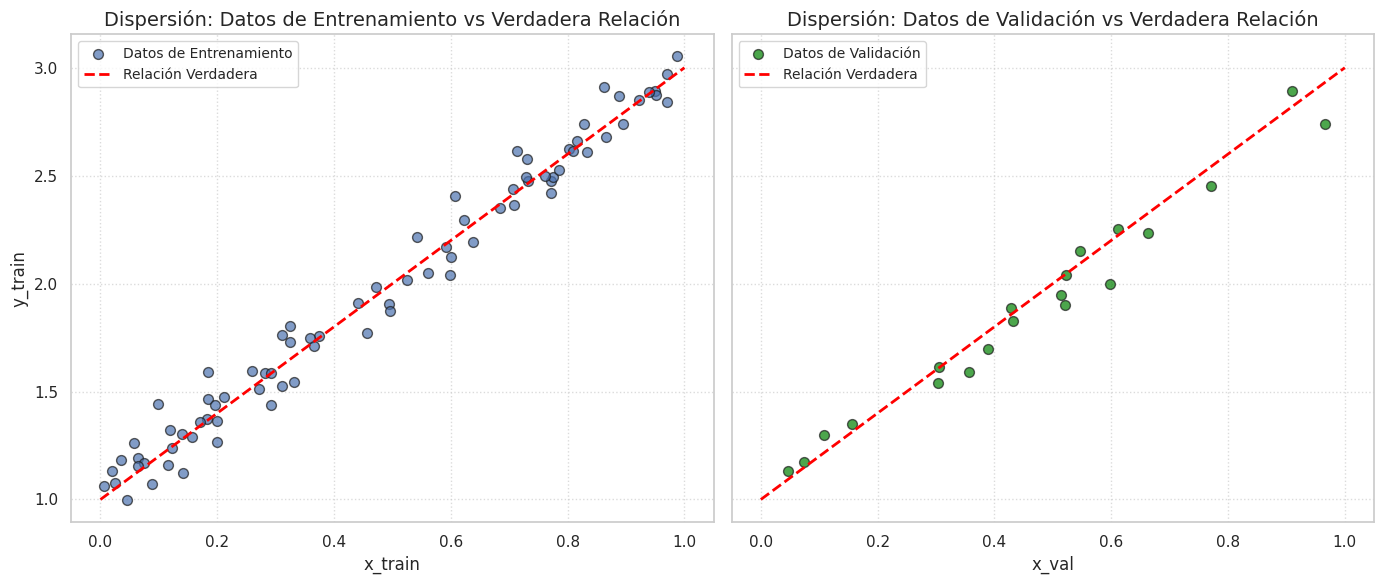

In [ ]:
# Aplicar un tema de Seaborn para mejorar la apariencia
sns.set_theme(style="whitegrid") # Puedes probar "darkgrid", "white", "ticks"

# Crear una figura con dos subplots (uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey para misma escala en Y

# 1. Gráfico para datos de ENTRENAMIENTO
axes[0].scatter(x_train, y_train, alpha=0.7, edgecolor='k', s=50, label='Datos de Entrenamiento')
# Línea de la relación verdadera
x_line = np.linspace(0, 1, 100).reshape(-1, 1) # Rango de x original
y_line = true_b + true_w * x_line
axes[0].plot(x_line, y_line, color='red', linestyle='--', linewidth=2, label='Relación Verdadera')

axes[0].set_xlabel("x_train", fontsize=12)
axes[0].set_ylabel("y_train", fontsize=12)
axes[0].set_title("Dispersión: Datos de Entrenamiento vs Verdadera Relación", fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, linestyle=':', alpha=0.7)

# 2. Gráfico para datos de VALIDACIÓN
axes[1].scatter(x_val, y_val, alpha=0.7, color='green', edgecolor='k', s=50, label='Datos de Validación')
# Línea de la relación verdadera (la misma)
axes[1].plot(x_line, y_line, color='red', linestyle='--', linewidth=2, label='Relación Verdadera')

axes[1].set_xlabel("x_val", fontsize=12)
# axes[1].set_ylabel("y_val", fontsize=12) # No es necesario si sharey=True
axes[1].set_title("Dispersión: Datos de Validación vs Verdadera Relación", fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, linestyle=':', alpha=0.7)

# Ajustar el layout para que no se superpongan los títulos/etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Convertir a otro formato

In [ ]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [ ]:
float_tensor = x_train_tensor.float()
float_tensor.dtype

torch.float32

Ojo con las mofiicaciones

In [ ]:
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)
# Modifies the numpy array
dummy_array[1] = 0
# Tensor gets modified too...
dummy_tensor

tensor([1, 0, 3])

Me puedo devolver

In [ ]:
dummy_tensor.numpy()

array([1, 0, 3])

**GPU**

In [ ]:
import torch
import numpy

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
  print(torch.cuda.get_device_name(i))

Tesla T4


Me llevo un tensor a la gpu

In [ ]:
import numpy as np

# 1. Define true parameters and number of data points
true_b = 1
true_w = 2
N = 100

# 2. Data Generation
np.random.seed(42) # for reproducibility
x = np.random.rand(N, 1)
epsilon = (0.1 * np.random.randn(N, 1)) # Note: using 'epsilon' instead of 'épsilon' for standard variable naming
y = true_b + true_w * x + epsilon

# 3. Shuffle indices for splitting data
idx = np.arange(N)
np.random.shuffle(idx)

# 4. Define split point and create train/validation indices
split_ratio = 0.8
train_idx = idx[:int(N * split_ratio)]
val_idx = idx[int(N * split_ratio):]

# 5. Generate train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [ ]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.7713], device='cuda:0', dtype=torch.float64)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [ ]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


COnvertirlo de vuelto a numpy

In [ ]:
back_to_numpy = x_train_tensor.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

Primero retornerlo a CPU

In [ ]:
back_to_numpy = x_train_tensor.cpu().numpy()